<a href="https://colab.research.google.com/github/abner-lucas/PSO_UFPA/blob/master/atividade_random_walk_abner_pereira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade - Random Wal
Discente: Ábner Pereira

# Índice
- [Caso teste](#scrollTo=U2HliHkUmg5R)
   - [Função objetivo](#scrollTo=fCgo39sIvVbN)
   - [Equação](#scrollTo=YnedX724ybG5)
   - [Faixas](#scrollTo=LVrSbF36yiJP)
   - [Funções](#scrollTo=E-91koMQmg5T)
   - [Resultado](#scrollTo=FoGV4YIQqngS)
   - [Visualização](#scrollTo=dFoWZpfaGijG)

# Caso teste

Nesta atividade será desenvolvido um Random Walk para achar o mínimo da [função objetivo](#scrollTo=fCgo39sIvVbN) abaixo. Usando uma distribuição uniforme para gerar uma população de sequências (x1, x2, e x3) de números reais variando de 0 a 1, convertidos respectivamente segundo as [faixas](#scrollTo=LVrSbF36yiJP) de x1, x2 e x3, sob a [Equação](#scrollTo=YnedX724ybG5) abaixo.

### Função objetivo

In [ ]:
from IPython.display import Image
PATH = "/content/drive/MyDrive/Colab Notebooks/PPGCC/PSO/Atividades/imagens/"

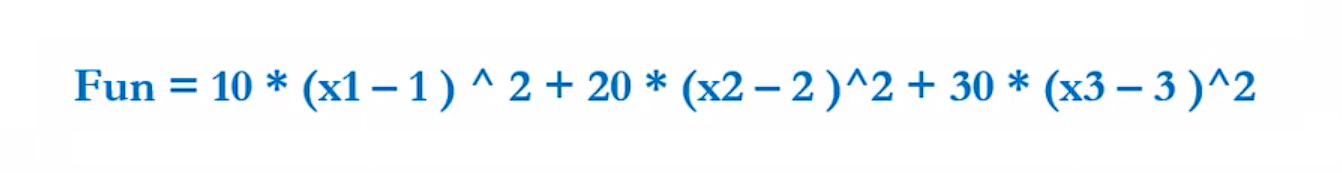

In [ ]:
Image(filename = PATH + "funcao_objetivo_random_walk.png", height=80)

### Equação

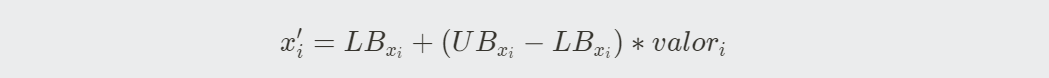

In [ ]:
Image(filename = PATH + "equacao1_random_walk.png", height=58)

### Faixas

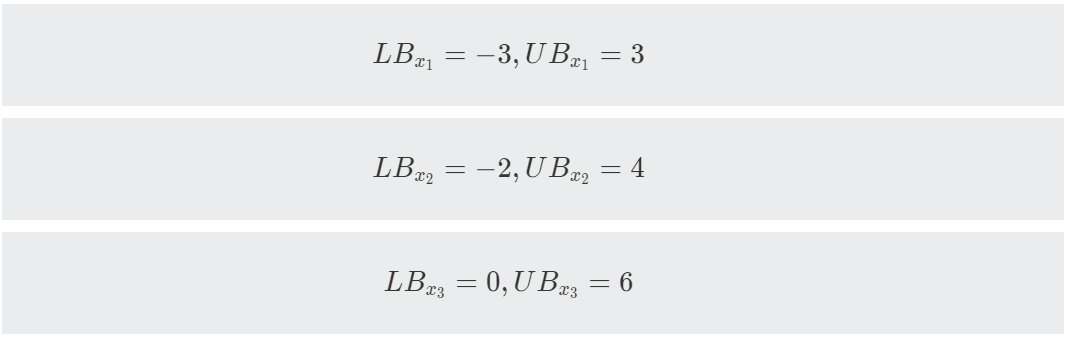

In [ ]:
Image(filename = PATH + "faixas_random_walk.png", width=800)

### Funções

In [ ]:
import numpy as np

In [ ]:
def random_walk(x_inf, x_sup, qtd_seqs, qtd_valores):
  #valores a aleatórios
  populacao = np.random.uniform(x_inf,x_sup,(qtd_seqs,qtd_valores))

  return populacao

In [ ]:
def populacao(qtd_seqs, qtd_valores, populacao):
  lb = [-3, -2, 0] 
  ub = [3, 4, 6]

  #conversão nas faixas
  i = 0
  j = 0
  for i in range(qtd_seqs):
    for j in range(qtd_valores):
      # equação 1 em cada valor
      populacao[i][j] = lb[j] + (ub[j] - lb[j]) * populacao[i][j]
      j += 1
    i += 1
  return populacao

In [ ]:
def float_2_point(qtd_seqs, qtd_valores, populacao):
  i = 0
  j = 0
  for i in range(qtd_seqs):
    for j in range(qtd_valores):
      # apresenta cada valor em float com 2 casas decimais
      populacao[i][j] = round(populacao[i][j], 2)
      j += 1
    i += 1
  return populacao

In [ ]:
def funcao_obj(x1, x2, x3):
  y = 10 * (x1 - 1)**2 + 20 * (x2 - 2)**2 + 30 * (x3 - 3)**2
  return y

In [ ]:
def resultado(qtd_seqs, qtd_valores, populacao):
  i = 0
  j = 0
  x = [0,0,0]
  y = []
  for i in range(qtd_seqs):
    for j in range(qtd_valores):
      x[j] = populacao[i][j]
      j += 1
    y.append(funcao_obj(x[0], x[1], x[2]))
    i += 1
  return y

### Resultados

In [ ]:
#Entrada
x_inf = 0
x_sup = 1
qtd_seqs = 100
qtd_valores = 3
qtd_iteracoes = 20
medias = []
desvios = []

i = 0
for i in range(qtd_iteracoes):
  #Criando população com indivíduos aleatórios com valores entre X_INF e X_SUP convertendo-os às faixas
  if i == 0:
    populacao_final = populacao(qtd_seqs, qtd_valores, random_walk(x_inf, x_sup, qtd_seqs, qtd_valores))
  else:
    populacao_final = []
    populacao_final = populacao(meio, qtd_valores, random_walk(x_inf, x_sup, meio, qtd_valores))
 
  #Gerando resultado para cada indivíduo
  if i == 0:
    result = resultado(qtd_seqs, qtd_valores, populacao_final)
  else:
    result = []
    result = resultado(meio, qtd_valores, populacao_final)

  #Ordenando indivíduos/resultados
  if i == 0:
    result_order = sorted(result)
  else:
    del(result_order[meio:qtd_seqs])
    result_order.extend(result)
    result_order = sorted(result_order)

  #Pegando 50% melhores indivíduos
  melhores.clear()
  meio = int(len(result_order)/2)
  i = 0
  for i in range(meio):
    melhores.append(result_order[i])
  
  #Calculando a médio entre os melhores da geração
  medias.append(np.mean(melhores))

  #Calculando desvio padrão entre os melhores da geração
  desvios.append(st.stdev(melhores))

### Visualização

In [ ]:
import ipywidgets as widgets
from IPython import display
import pandas as pd

# CRIANDO DATA FRAME DAS TABELAS DE RESULTADOS
df1 = pd.DataFrame(result_order)
df2 = pd.DataFrame(medias)
df3 = pd.DataFrame(desvios)

widget1 = widgets.Output()
widget2 = widgets.Output()
widget3 = widgets.Output()

with widget1:
    display.display(df1)
with widget2:
    display.display(df2)
with widget3:
    display.display(df3)

hbox = widgets.HBox([widget1, widget2, widget3])

hbox

In [ ]:
import matplotlib.pyplot as plt

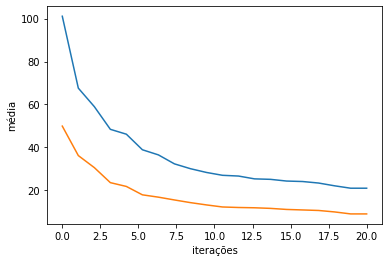

In [ ]:
x = np.linspace(0, len(medias), qtd_iteracoes)
plt.plot(x, medias, label='linear')
plt.plot(x, desvios, label='linear')
plt.xlabel('iterações')
plt.ylabel('média')
plt.show()